In [ ]:
!pip install networkx pennylane pandas matplotlib

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from adiaframe import Hamiltonian
#from adiaframe import utils_c as uc

/var/folders/wv/cwvgxcp14lxcs5jn0r6p87sr0000gn/T/ipykernel_3761/616370124.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Build your custom Hamiltonian with
import pennylane as qml

# 2 sites XXZ spin-1/2 chain (PBC)

coeffs_X = -0.5*np.ones(3)
coeffs_Z = np.ones(3)
coeffs = np.concatenate([coeffs_X, coeffs_Z])

print(coeffs)
ops = [qml.PauliX(0) @ qml.PauliX(1), qml.PauliX(1) @ qml.PauliX(2), qml.PauliX(2) @ qml.PauliX(0),
    qml.PauliZ(0) @ qml.PauliZ(1), qml.PauliZ(0) @ qml.PauliZ(1), qml.PauliZ(0) @ qml.PauliZ(1)]

H_XXZ = qml.Hamiltonian(coeffs, ops) 
H_XXZ = np.matrix(qml.matrix(H_XXZ))
print(H_XXZ)
#H = #np.array(...) 2D matrix
hamiltonian = Hamiltonian(H_XXZ, commute_map=True)
# or 
# pauli_sample = {"Pstring": coefficient, ...}
# H = Hamiltonian.p_poly_to_H(pauli_sample)
# hamiltonian = Hamiltonian(H, pauli_basis=pauli_sample, commute_map=True)

[-0.5 -0.5 -0.5  1.   1.   1. ]
[[ 3. +0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j -0.5+0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j  3. +0.j -0.5+0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]
 [ 0. +0.j -0.5+0.j -3. +0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -3. +0.j  0. +0.j -0.5+0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j -0.5+0.j  0. +0.j -3. +0.j  0. +0.j  0. +0.j -0.5+0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j -3. +0.j -0.5+0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j -0.5+0.j  3. +0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j -0.5+0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j  3. +0.j]]


In [3]:
# See Pauli term and their coefficient:
hamiltonian.local_decomposition.tail(10)

,Pstring,type,Z,X,Coef
0,ZZI,0,6,0,3.0+0.0j
1,IXX,1,0,3,-0.5+0.0j
2,XIX,1,0,5,-0.5+0.0j
3,XXI,1,0,6,-0.5+0.0j


In [4]:
#hamiltonian.local_decomposition.pivot(index="X", columns="Z", values="Coef")

The below properties are automatically generated.

In [5]:
hamiltonian.commute_map

,source,target,Zs,Xs,Zt,Xt,commute
0,ZZI,IXX,6,0,0,3,0
1,ZZI,XIX,6,0,0,5,0
2,ZZI,XXI,6,0,0,6,1
3,IXX,XIX,0,3,0,5,1
4,IXX,XXI,0,3,0,6,1
5,XIX,XXI,0,5,0,6,1


In [6]:
hamiltonian.graph_edge

,source,target,Zs,Xs,Zt,Xt,commute
0,ZZI,IXX,6,0,0,3,0
1,ZZI,XIX,6,0,0,5,0
2,ZZI,XXI,6,0,0,6,1
3,IXX,XIX,0,3,0,5,1
4,IXX,XXI,0,3,0,6,1
5,XIX,XXI,0,5,0,6,1


In [7]:
#hamiltonian.latin_matrix # error
# See Latin matrix
#fig, ax = plt.subplots(1,1, figsize=(10, 10))
#ax.spy(hamiltonian.latin_matrix, markersize=10)
#ax.set_xlabel("Z family")
#ax.xaxis.set_label_position('top') 
#ax.set_ylabel("X family")

In [8]:
from adiaframe import graph_op
from copy import deepcopy
from networkx.algorithms.approximation import max_clique 
# It only works for binary graph indicating commuting map.

In [9]:
G_b = graph_op.get_binary_graph(hamiltonian) # get commuting graph

In [10]:
g_classic = deepcopy(G_b)
max_cliques = []
while len(g_classic.nodes) >0:
    clique = max_clique(g_classic)
    max_cliques.append(clique)
    for node in clique:
        g_classic.remove_node(node)

In [11]:
print("Classic Clique solver:")
print("Partition:", len(max_cliques))
for c in max_cliques:
    print(len(c), end=", ")
print("============================================")
for c in max_cliques:
    print(c)

Classic Clique solver:
Partition: 2
2, 2, ============================================
{'IXX', 'XIX'}
{'ZZI', 'XXI'}


In [12]:
np.abs(complex(0.5,0.2))

0.5385164807134504

In [13]:
from adiaframe.utils import evolve_circuit

In [14]:
wires = hamiltonian.qubit_num # number of qubits
dev = qml.device('default.qubit', wires=wires+1, shots=1000)

In [29]:
@qml.qnode(dev)
@qml.defer_measurements
def evolve_hamiltonian(h:Hamiltonian, max_cliques:list, t:float):
    for i in range(wires):
        qml.Hadamard(i)
    qml.Barrier(wires=range(wires))
    i=0
    m0 = 0
    for c in max_cliques:
        for p in c:
            coef = h.local_decomposition.loc[h.local_decomposition["Pstring"] == p]["Coef"]
            m0 = evolve_circuit(p,i%wires, float(coef),t,
                True #imaginary
            )
            print(m0)
            if m0 == 1:
                print("Failed")
                break
            i+=1
        if m0==1:
            break
    hermit = qml.Hermitian(h.Hamiltonian, wires=range(wires))
    return qml.expval(hermit)




In [44]:
@qml.qnode(dev)
#@qml.defer_measurements
def test():
    qml.PauliX(1)
    qml.Hadamard(2)
    m0 = qml.measure(qml.PauliZ(0))
    m1 = qml.measure(qml.PauliZ(1))
    m2 = qml.measure(qml.PauliZ(2))
    print(m0)
    print(m1)
    print(m2)
    return qml.expval(qml.PauliZ(0))

In [45]:
test()

if 9a028afe=0 => 0
if 9a028afe=1 => 1
if bd663548=0 => 0
if bd663548=1 => 1
if b2b1056e=0 => 0
if b2b1056e=1 => 1


/Users/hyunseongkim/miniconda3/envs/quantum_computer/lib/python3.11/site-packages/pennylane/operation.py:736: UserWarning: The behaviour of operator hashing will be updated soon. Currently, each operator instance has a unique hash. Soon, an operator's hash will be determined by the combined hash of the name, wires, parameters and hyperparameters of the operator. To continue using operator hashing in its current state, wrap the operator inside a qml.queuing.WrappedObj instance.
  warnings.warn(


tensor(1., requires_grad=True)

In [30]:
t = 0.1

if 5f239d58=0 => 0
if 5f239d58=1 => 1
Failed


/var/folders/wv/cwvgxcp14lxcs5jn0r6p87sr0000gn/T/ipykernel_3761/2437783238.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  m0 = evolve_circuit(p,i%wires, float(coef),t,
/Users/hyunseongkim/miniconda3/envs/quantum_computer/lib/python3.11/site-packages/pandas/core/series.py:246: ComplexWarning: Casting complex values to real discards the imaginary part
  return converter(self.iloc[0])
/Users/hyunseongkim/miniconda3/envs/quantum_computer/lib/python3.11/site-packages/pennylane/operation.py:736: UserWarning: The behaviour of operator hashing will be updated soon. Currently, each operator instance has a unique hash. Soon, an operator's hash will be determined by the combined hash of the name, wires, parameters and hyperparameters of the operator. To continue using operator hashing in its current state, wrap the operator inside a qml.queuing.WrappedObj instance.
  warnings.warn(
/var/folder

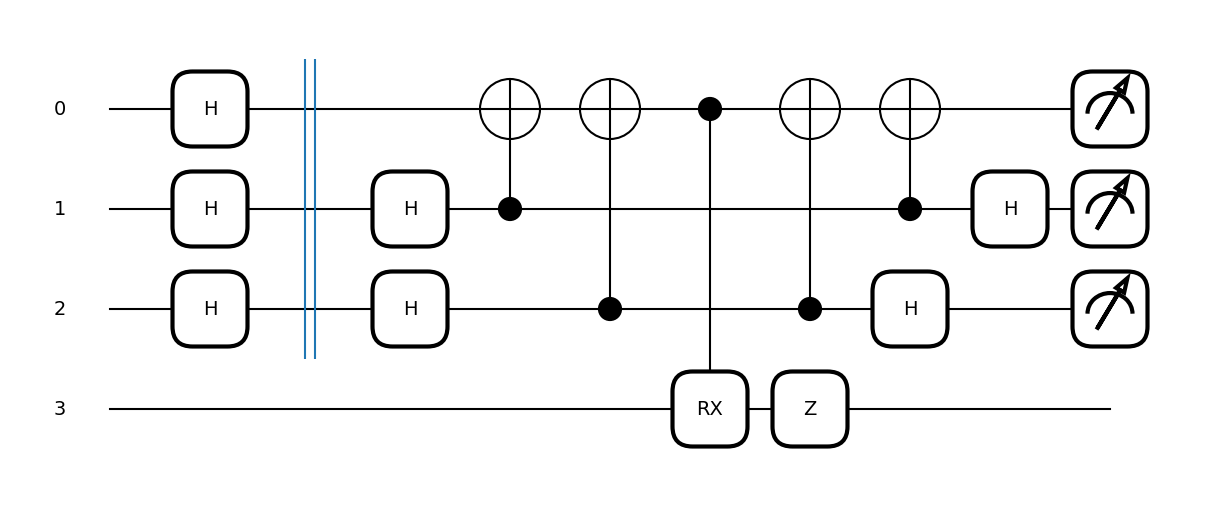

In [31]:
fig, ax = qml.draw_mpl(evolve_hamiltonian)(hamiltonian, max_cliques, t)
fig.show()

In [21]:
evolve_hamiltonian(hamiltonian, max_cliques, t)

Failed


/var/folders/wv/cwvgxcp14lxcs5jn0r6p87sr0000gn/T/ipykernel_3761/3913154599.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  m0 = evolve_circuit(p,i%wires, float(coef),t,


array(-1.48155163)

In [22]:
for i in range(30):
    evolve_hamiltonian(hamiltonian, max_cliques, t)

Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed


/var/folders/wv/cwvgxcp14lxcs5jn0r6p87sr0000gn/T/ipykernel_3761/3913154599.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  m0 = evolve_circuit(p,i%wires, float(coef),t,
/Users/hyunseongkim/miniconda3/envs/quantum_computer/lib/python3.11/site-packages/pandas/core/series.py:246: ComplexWarning: Casting complex values to real discards the imaginary part
  return converter(self.iloc[0])
/Users/hyunseongkim/miniconda3/envs/quantum_computer/lib/python3.11/site-packages/pennylane/operation.py:736: UserWarning: The behaviour of operator hashing will be updated soon. Currently, each operator instance has a unique hash. Soon, an operator's hash will be determined by the combined hash of the name, wires, parameters and hyperparameters of the operator. To continue using operator hashing in its current state, wrap the operator inside a qml.queuing.WrappedObj instance.
  warnings.warn(
